<a href="https://colab.research.google.com/github/fikremariyam1/iris-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Group 2
Course: Data Mining 


In [21]:
!pip install seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
uploaded = files.upload()

df = pd.read_csv('Iris.csv')
df.head()


Saving Iris.csv to Iris (1).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df['Species'] = ['Iris-setosa'] * 50 + ['Iris-versicolor'] * 50 + ['Iris-virginica'] * 50
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.columns = ['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
df.head()


,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
feature_columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


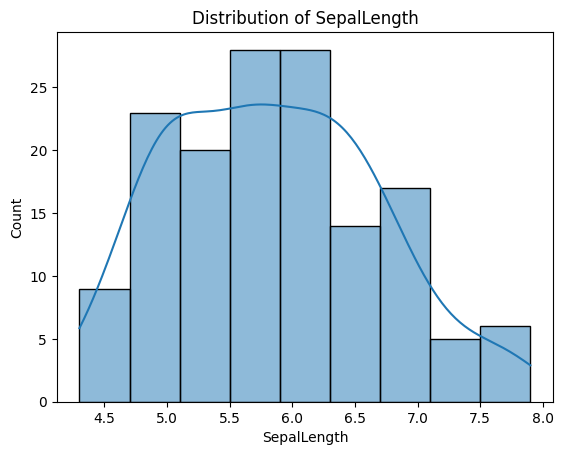

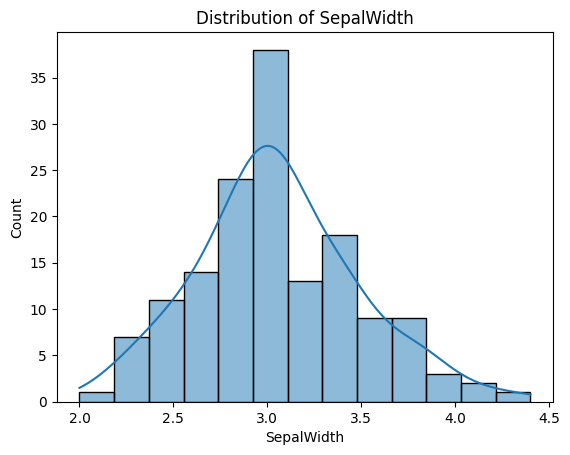

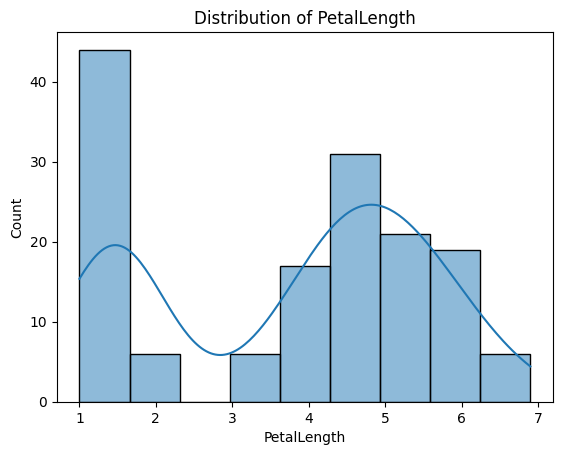

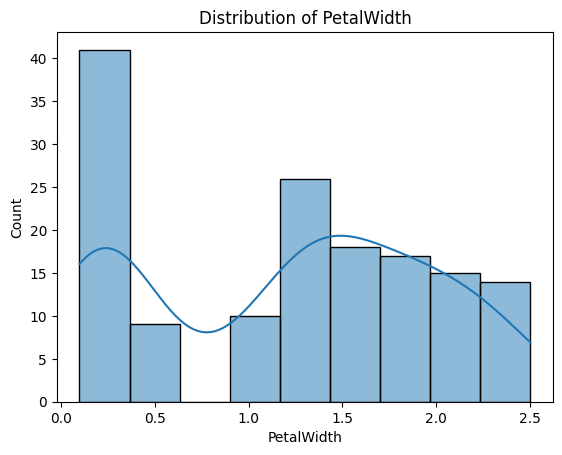

In [27]:
for col in feature_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


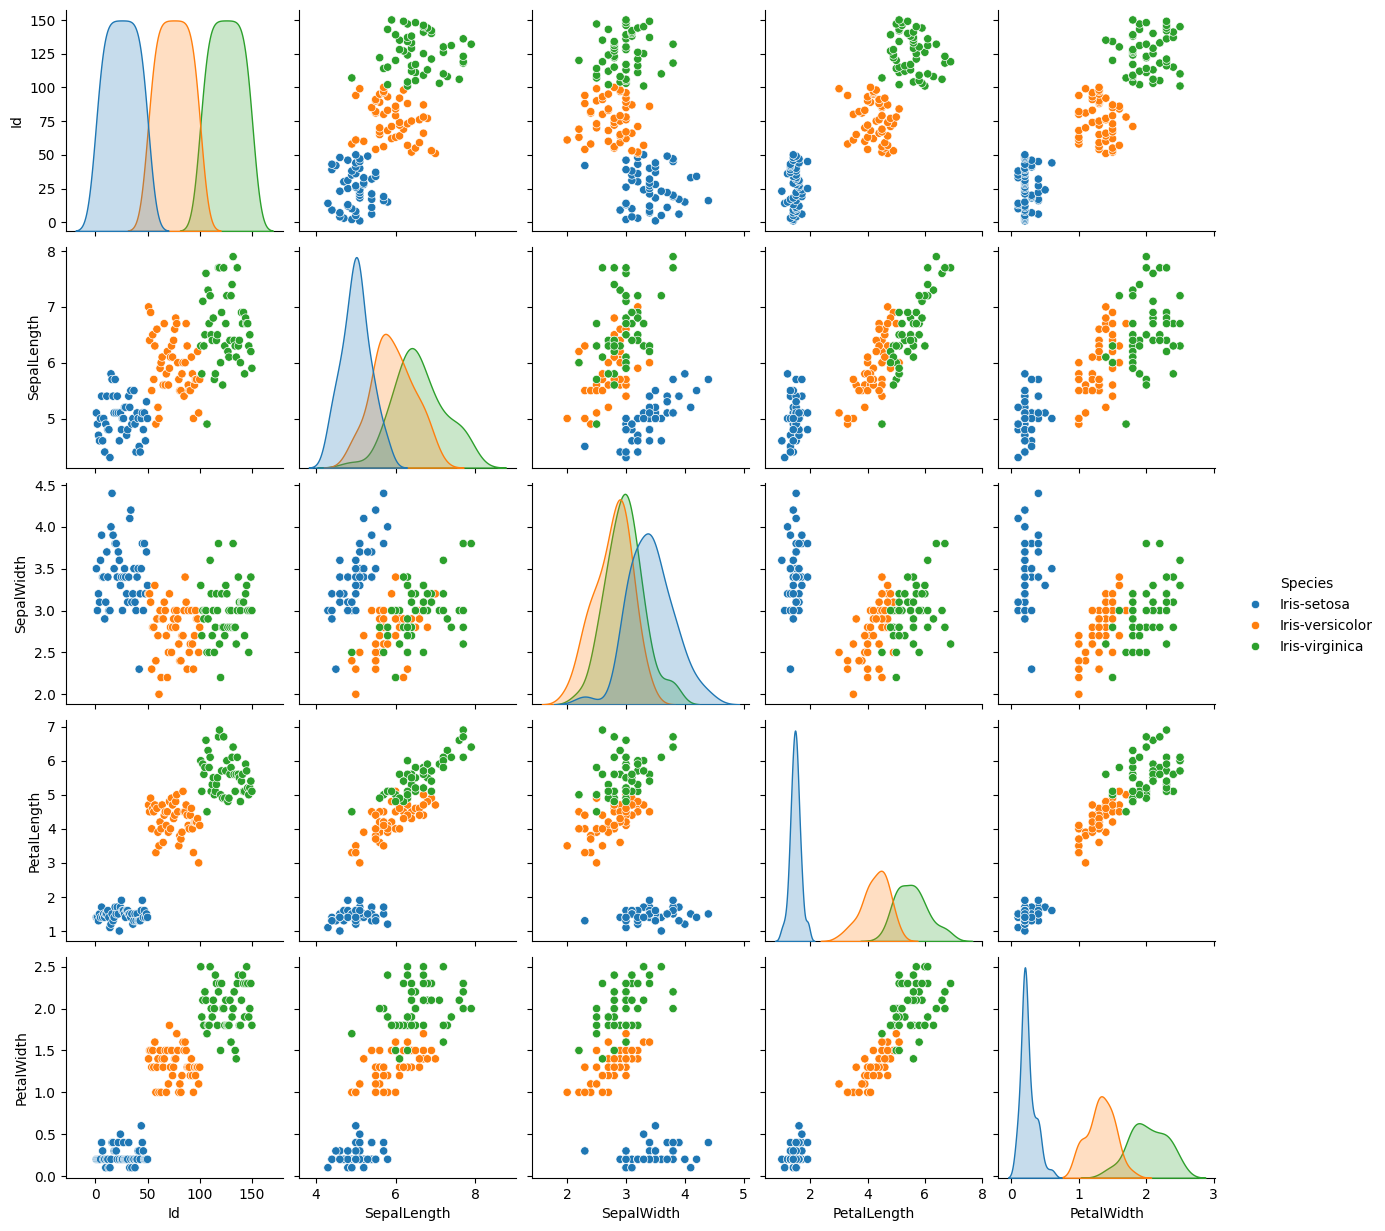

In [28]:
sns.pairplot(df, hue='Species')
plt.show()


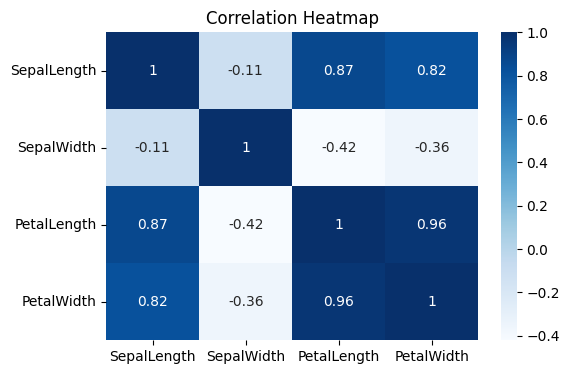

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df[feature_columns].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [30]:
X = df[feature_columns]
y = df['Species']


In [31]:
le = LabelEncoder()
y = le.fit_transform(y)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [33]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X_test)


In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8947368421052632

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



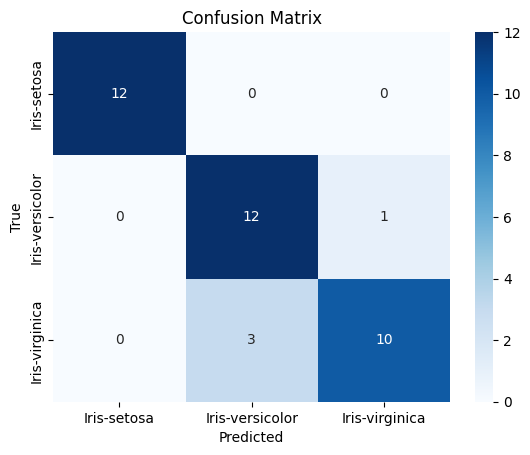

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


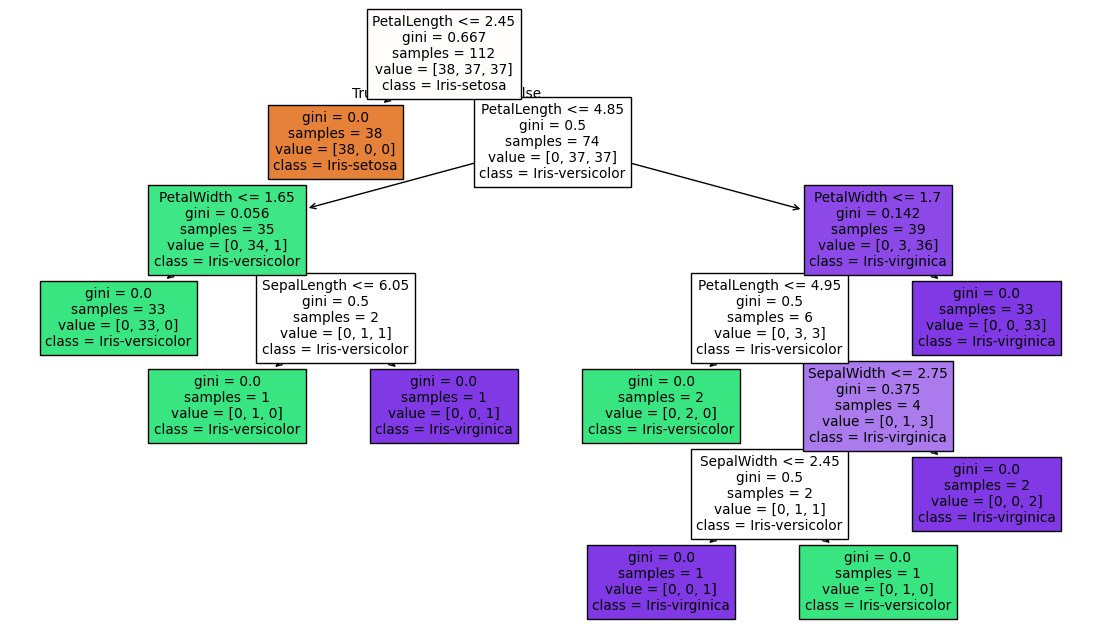

In [37]:
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=feature_columns, class_names=le.classes_, filled=True)
plt.show()
